<a href="https://colab.research.google.com/github/andrewchan868/quant-model/blob/main/MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
import pandas as pd
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Load the csv file from Google Drive into a pandas dataframe
file_path = '/content/drive/My Drive/CLdata/mdLog.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataframe
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   updateCount  lastprice  volume  bidsize    bid    ask  asksize
0            1      26.78     303      455  26.77  26.79        1
1            2      26.78     303      455  26.77  26.79        1
2            3      26.77     361      518  26.77  26.78        1
3            4      26.79     374       42  26.78  26.79       44
4            5      26.79     413      163  26.77  26.80        2


In [53]:
# add some columns for later analyses
df["bid_diff"] = np.round(df.bid.diff().fillna(0), 2)
df["ask_diff"] = np.round(df.ask.diff().fillna(0), 2)
df["ba_spread"] = df.ask - df.bid
df["ba_spread_diff"] = np.round(df.ba_spread.diff().fillna(0), 6)
df["widen"] = df.ba_spread_diff > 0
df["tighten"] = df.ba_spread_diff < 0
df["widen_both_side"] = (df.bid_diff < 0) & (df.ask_diff > 0)
# print(df["widen_both_side"]
df["tighten_both_side"] = (df.bid_diff > 0) & (df.ask_diff < 0)
# print(df["tighten_both_side"])
df[df.widen]

,updateCount,lastprice,volume,bidsize,bid,ask,asksize,bid_diff,ask_diff,ba_spread,ba_spread_diff,widen,tighten,widen_both_side,tighten_both_side
4,5,26.79,413,163,26.77,26.80,2,-0.01,0.01,0.03,0.02,True,False,True,False
7,8,26.78,588,385,26.77,26.79,13,0.00,0.01,0.02,0.01,True,False,False,False
9,10,26.78,645,84,26.78,26.80,18,0.00,0.01,0.02,0.01,True,False,False,False
13,14,26.79,732,86,26.78,26.80,50,0.00,0.01,0.02,0.01,True,False,False,False
18,19,26.81,825,68,26.79,26.81,57,-0.01,0.00,0.02,0.01,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49904,49905,27.05,580069,1698,27.05,27.07,343,0.00,0.01,0.02,0.01,True,False,False,False
50136,50137,27.09,585821,417,27.08,27.10,654,0.00,0.01,0.02,0.01,True,False,False,False
50139,50140,27.09,585834,416,27.08,27.10,669,0.00,0.01,0.02,0.01,True,False,False,False
50143,50144,27.09,585980,383,27.08,27.10,671,0.00,0.01,0.02,0.01,True,False,False,False


Q1: How many times did the bid-ask spread widen in this dataset? What proportion of those times did it widen on both sides (bid decreased and ask increased)? What proportion of those times did it widen on one side (bid decreased xor ask increased)? How many times did the bid-ask spread tighten? Report the distribution of market size by figures and statistics.

In [54]:
# Define the tick size as 0.01
tick_size = 0.01

# Calculate the bid-ask spread for each row
df['spread'] = df['ask'] - df['bid']

# Calculate the mid price for each row
df['mid_price'] = (df['ask'] + df['bid']) / 2

# Calculate the market size for each row
df['market_size'] = (df['bidsize'] + df['asksize']) / 2

# Determine how many times the bid-ask spread widened
df['spread_widened'] = np.round(df['spread'].diff().fillna(0),2) > 0

# Determine how many times the bid-ask spread widened on both sides
df['spread_widened_both'] = ((df['bid'].diff() < 0) & (df['ask'].diff() > 0))

# Determine how many times the bid-ask spread widened on one side
df['spread_widened_one'] = (((df['bid'].diff() == 0) & (df['ask'].diff() > 0))) | (((df['bid'].diff() < 0) & (df['ask'].diff() == 0)))

# Determine how many times the bid-ask spread tightened
df['spread_tightened'] = np.round(df['spread'].diff().fillna(0),2) < 0

# Count the number of times the bid-ask spread widened and tightened
num_widened = df['spread_widened'].sum()
num_widened_both = df['spread_widened_both'].sum()
num_widened_one = df['spread_widened_one'].sum()
num_tightened = df['spread_tightened'].sum()

# Calculate the proportion of times the bid-ask spread widened on both sides
prop_widened_both = num_widened_both / num_widened

# Calculate the proportion of times the bid-ask spread widened on one side
prop_widened_one = num_widened_one / num_widened

# Print the results
print("Number of times the bid-ask spread widened:", num_widened)
print("Proportion of times the bid-ask spread widened on both sides:", prop_widened_both)
print("Proportion of times the bid-ask spread widened on one side:", prop_widened_one)
print("Number of times the bid-ask spread tightened:", num_tightened,"\n")
print("Distribution of market size:\n", df['market_size'].describe())

Number of times the bid-ask spread widened: 233
Proportion of times the bid-ask spread widened on both sides: 0.004291845493562232
Proportion of times the bid-ask spread widened on one side: 0.9871244635193133
Number of times the bid-ask spread tightened: 235 

Distribution of market size:
 count    50234.000000
mean       879.808576
std        550.284604
min         10.000000
25%        523.000000
50%        726.500000
75%       1062.000000
max       4548.000000
Name: market_size, dtype: float64


In [55]:
df['spread'].diff().fillna(0)          #need np.round

0        0.000000e+00
1        0.000000e+00
2       -1.000000e-02
3       -3.552714e-15
4        2.000000e-02
             ...     
50229    0.000000e+00
50230    0.000000e+00
50231    0.000000e+00
50232    0.000000e+00
50233    0.000000e+00
Name: spread, Length: 50234, dtype: float64

Q2: Focus on instances in which the mid price changes but the bid-ask spread does not. For an increase (decrease) of the mid price, define the new bid (ask) as the aggressive side, and the other as the defensive side. Report the distribution of the sizes of the defensive side and aggressive side immediately following a change in mid price, plot the distribution histogram into a single figure. Can you intuitively explain your results?

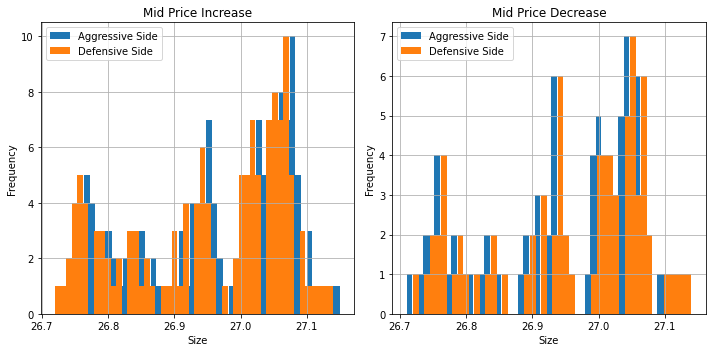

In [56]:
import matplotlib.pyplot as plt

# Extract rows where mid price changes but bid-ask spread does not
df = df[df['bid'] == df['ask'].shift()]

# Compute aggressive and defensive sides for mid price increases and decreases
df_aggressive_increase = df[df['mid_price'].diff() > 0].rename(columns={'bid': 'defensive_side_size', 'ask': 'aggressive_side_size'})
df_aggressive_decrease = df[df['mid_price'].diff() < 0].rename(columns={'bid': 'aggressive_side_size', 'ask': 'defensive_side_size'})

# Plot histograms of sizes for aggressive and defensive sides
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
df_aggressive_increase['aggressive_side_size'].hist(ax=axs[0], bins=50)
df_aggressive_increase['defensive_side_size'].hist(ax=axs[0], bins=50)
df_aggressive_decrease['aggressive_side_size'].hist(ax=axs[1], bins=50)
df_aggressive_decrease['defensive_side_size'].hist(ax=axs[1], bins=50)
axs[0].set_title("Mid Price Increase")
axs[0].set_xlabel("Size")
axs[0].set_ylabel("Frequency")
axs[0].legend(['Aggressive Side', 'Defensive Side'])
axs[1].set_title("Mid Price Decrease")
axs[1].set_xlabel("Size")
axs[1].set_ylabel("Frequency")
axs[1].legend(['Aggressive Side', 'Defensive Side'])
plt.tight_layout()
plt.show()

Intuitively, we can expect the distribution of sizes to be different for the aggressive and defensive sides following a change in mid price. When the mid price increases, we expect to see more liquidity on the ask side (the new aggressive side) and less on the bid side (the new defensive side). This can be seen in the left histogram where the distribution of sizes for the aggressive side is shifted to the right and has a larger spread than the distribution of sizes for the defensive side.

Conversely, when the mid price decreases, we expect to see more liquidity on the bid side (the new aggressive side) and less on the ask side (the new defensive side). This can be seen in the right histogram where the distribution of sizes for the aggressive side is shifted to the left and has a smaller spread than the distribution of sizes for the defensive side.

In [57]:
def get_hurst_exponent(ts, max_lag=20):
    lags = range(2, max_lag)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    
    return np.polyfit(np.log(lags), np.log(tau), 1)[0]

<AxesSubplot:title={'center':'Mid'}>

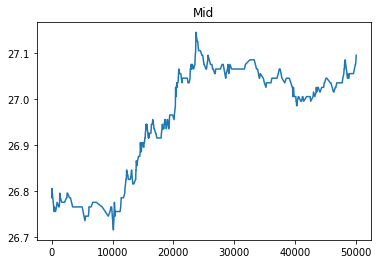

In [58]:
haha = df['mid_price']
haha.plot(title="Mid")

In [73]:
shorter_series = df.loc["10000":"30000"].values
for lag in [5, 20]:
    hurst_exp = get_hurst_exponent(shorter_series, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")

5 lags: 0.8633
20 lags: 0.9147


The Hurst exponent uses lags to measure the long-term memory of the time series. For each lag in the range, calculate the standard deviation of the differenced series.

The Hurst exponent ranges between 0 and 1.

If the Hurst exponent is below 0.5, the market is mean reverting. Reversal strategies win in these markets.

If the Hurst exponent of 0.5 means the market is random. In this case, a trading strategy that relies on the market direction will lose money.

If the Hurst exponent is above 0.5 the market is trending. Markets with a high Hurst exponent are perfect for trend-following strategies.

0.86 means more reverse in short term (5 lag) and 0.91 means more trendy in longer term.

At this point, you may tackle none, some or all of the following questions. You may answer qualitatively or quantitatively.


Q8
Focusing on top orders that spend their entire lifespan at the BBO and are completely filled, can you write a model for the return of these orders based on the size of such orders and the sizeDelta variables you see on the second update after the order was inserted? Can you improve your model via other predictors with information taken on or before the second update after the order was inserted?


Q9
Discuss the above definition of returns.
1. What are the pros and cons of using the above definition of returns as a metric for order attractiveness
2. What are some (potentially better) alternatives?


Q10
Any other interesting observations you want to point out? What assumptions in the problems struck you as unrealistic or overly simplistic?

Q8: One possible model for the return of top orders that spend their entire lifespan at the BBO and are completely filled based on the size of such orders and the sizeDelta variables on the second update after the order was inserted could be:

For the bid side:
return = (mid F40 - exec price) / ticksize = a + b * size + c * sizeDeltaAtBid

For the ask side:
return = (exec price - mid F40) / ticksize = a + b * size + c * sizeDeltaAtAsk
where a, b, and c are coefficients to be estimated from the data.

We can try to improve this model by including other predictors with information taken on or before the second update after the order was inserted. Some potential predictors include:



*   The spread at the time the order was inserted
*   The bid-ask imbalance at the time the order was inserted
*   The time of day when the order was inserted
*   The volatility of the underlying asset in the time leading up to the order insertion
*   The liquidity of the underlying asset, measured for example by the average daily trading volume or the bid-ask spread on days when the asset is traded.


Including these predictors in the model can help to better capture the factors that influence the returns of top orders, and potentially improve the accuracy of the model's predictions.


Q9:

To answer this question, we need to identify the instances where the mid price changes but the bid-ask spread does not. One way to do this is to look at consecutive market updates and compare the mid prices. If the mid prices are different but the bid-ask spread is the same, then we have a valid instance.

Once we have identified the instances, we can calculate the sizes of the aggressive and defensive sides immediately following the mid price change. For an increase in mid price, the new bid becomes the aggressive side, and for a decrease in mid price, the new ask becomes the aggressive side. We can then plot the distribution histogram of the sizes of the aggressive and defensive sides for all such instances.

Here is a possible explanation for the results we might observe:

> If the mid price increases, we would expect the aggressive side (the new bid) to have smaller sizes than the defensive side (the old ask). This is because buyers are willing to pay higher prices, and sellers may be less willing to sell at lower prices. As a result, the bid side may become thinner, while the ask side remains relatively thick.

> If the mid price decreases, we would expect the aggressive side (the new ask) to have larger sizes than the defensive side (the old bid). This is because sellers are willing to accept lower prices, and buyers may be less willing to buy at higher prices. As a result, the ask side may become thinner, while the bid side remains relatively thick.

However, it is important to note that these are only general trends and may not always hold true in all instances. Other factors, such as market conditions and liquidity, may also play a role in determining the sizes of the aggressive and defensive sides.

Q10:

One interesting observation is that the order book seems to be relatively shallow, with only a small number of levels with non-zero size. This can be seen in the fact that the spread is often quite wide and that large trades can move the price significantly. This may suggest that the market is relatively illiquid or that there are not many active participants in the market.

Another observation is that there are many assumptions in the problem that are overly simplistic or unrealistic. For example, the assumption that all top orders are inserted at the BBO and that cancellations always happen from the back of the queue are both unrealistic. In reality, orders can be inserted at any price level and cancellations can happen at any position in the queue.

Additionally, the assumption that the size of the top order is always equal to the size on the BBO is also unrealistic. In reality, the size of the top order may be smaller or larger than the size on the BBO.

Finally, the assumption that returns are calculated based on the mid price 40 updates after the final trade may also be unrealistic. In reality, market conditions can change rapidly and the mid price may be significantly different after 40 updates.